# **Utilizing Classification Models To Predict Presence of Heart Disease**

**Baradhwaj Balraj**


## **Research Question**
Is it possible to create a reliable model to predict if a patient will have Cardiovascular Disease and What factors should be frequently observed by healthcare professionals to diagnose Cardiovascular Disease?

## **Rationale**
According to the CDC in the year 2022, 702,880 people died from heart disease, which is equivalent to 1 in 5 deaths.  Additionally, according to the CDC, heart disease cost about $252.2 billion from 2019 to 2020 which includes the cost of health care services, medicines, and lost productivity due to death.  This question is important for two reasons. One reason is because if it is possible to know what factors most contribute to heart disease, it would be possible for healthcare professionals to monitor those important factors more closely to determine wether or not patients might be in risk for heart disease and can diagnose them early and get the patients the necessary care.  The second reason is if you can predict wether patients have heart disease using a model it would be possible to test someone who isn’t known to have heart disease and diagnose wether heart disease is prevalent in them or not.  If heart disease is diagnosed early it can help prevent serious complications such as heart attack, strokes, and heart failure by implementing preventative strategies.

## **Methodology**
Plan on utilitizing four different classification models (Logistic Regression, K-Nearest Neighbors, SVM, and Decision Trees) to determine if it is possible to make a model to predict if cancer will be prevalent in patients based on certain features found in data set and which model would do this best.  After this will utilize permutation importance on the best model to determine which factors are most important to monitor when attempting to diagnose heart disease in patients.

## **Expected Results**
Firstly, I expect to create a classification model using Logistic Regression, K-Nearest Neighbors, Decision Trees, and SVM to predict if a patient has heart disease. Second, I expect to find out which model has the best performance when regarding its ability to predict if someone will have heart disease.  Finally, I expect to find out which factors contribute most to a positive diagnosis of heart disease by using Permutation Importance on whatever model performs best.

##**Data**
The data source is a database from the UCI ML learning repository that contains 14 features of numerous patients that have and don’t have heart disease in the city of Cleveland.

Link: https://archive.ics.uci.edu/dataset/45/heart+disease

# **Importing Libraries**

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, precision_recall_curve, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.inspection import permutation_importance
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# **Data Exploration and Preperation**

In [109]:
#Load Data
heart_df = pd.read_csv('data/cleveland.csv')

In [110]:
#Check Data
heart_df.info()
missing_values = heart_df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   63.0    302 non-null    float64
 1   1.0     302 non-null    float64
 2   1.0.1   302 non-null    float64
 3   145.0   302 non-null    float64
 4   233.0   302 non-null    float64
 5   1.0.2   302 non-null    float64
 6   2.0     302 non-null    float64
 7   150.0   302 non-null    float64
 8   0.0     302 non-null    float64
 9   2.3     302 non-null    float64
 10  3.0     302 non-null    float64
 11  0.0.1   302 non-null    object 
 12  6.0     302 non-null    object 
 13  0       302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
Missing Values:
63.0     0
1.0      0
1.0.1    0
145.0    0
233.0    0
1.0.2    0
2.0      0
150.0    0
0.0      0
2.3      0
3.0      0
0.0.1    0
6.0      0
0        0
dtype: int64


In [111]:
#Rename Columns To Give Context To Dataframe
heart_df.columns = ['Age','Sex','ChestPainType','RestingBloodPressure','Cholesterol','Fasting Blood Sugar','RestingECG','MaxHeartRate','EIA','OldPeak','Slope','No Major Vessels','thal','Heart Disease']

In [112]:
#Check Data Again
heart_df.info()
missing_values = heart_df.isnull().sum()
print(f"Missing Values:\n{missing_values}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      302 non-null    object 
 12  thal                  302 non-null    object 
 13  Heart Disease         302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
Missing Values:

In [113]:
#Check To see how target variable is conveyed in DataFrame
heart_df['Heart Disease'].unique()
#Shows 5 different unique values.
#0 = No Heart Disease
#1-4 = Yes Heart Diseases but different stages (ie. Stage 1,etc.)

array([2, 1, 0, 3, 4])

In [114]:
# To predict Heart Disease or not 0 indicates no heart disease and any other value indicates heart disease
heart_df['Heart Disease Binary'] = (heart_df['Heart Disease'] > 0).astype(int)
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      302 non-null    object 
 12  thal                  302 non-null    object 
 13  Heart Disease         302 non-null    int64  
 14  Heart Disease Binary  302 non-null    int64  
dtypes: float64(11), int64(2

In [115]:
#Drop column Heart Disease and Check Data Again
clean_heart_df = heart_df.drop('Heart Disease', axis=1)
clean_heart_df.info()
clean_heart_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      302 non-null    object 
 12  thal                  302 non-null    object 
 13  Heart Disease Binary  302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


,Age,Sex,ChestPainType,RestingBloodPressure,Cholesterol,Fasting Blood Sugar,RestingECG,MaxHeartRate,EIA,OldPeak,Slope,No Major Vessels,thal,Heart Disease Binary
0,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
1,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
2,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
3,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
4,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0


In [116]:
#Replace ? with NA values
clean_heart_df = clean_heart_df.replace('?', np.nan)
clean_heart_df.info()

# Check How Many NaN Values Now
total_nan = clean_heart_df.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")
nan_per_column = clean_heart_df.isna().sum()
print(f"NaN values per column:\n{nan_per_column}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      298 non-null    object 
 12  thal                  300 non-null    object 
 13  Heart Disease Binary  302 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB
Total NaN value

In [117]:
#Replace NaN Values With Mode
numerical_cols = clean_heart_df.select_dtypes(include=['number']).columns
categorical_cols = clean_heart_df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    clean_heart_df[col] = clean_heart_df[col].fillna(clean_heart_df[col].mode()[0])

In [118]:
# Check To See If NaN Values Are Still Present.
total_nan = clean_heart_df.isna().sum().sum()
print(f"Total NaN values in the DataFrame: {total_nan}")
nan_per_column = clean_heart_df.isna().sum()
print(f"NaN values per column:\n{nan_per_column}")

Total NaN values in the DataFrame: 0
NaN values per column:
Age                     0
Sex                     0
ChestPainType           0
RestingBloodPressure    0
Cholesterol             0
Fasting Blood Sugar     0
RestingECG              0
MaxHeartRate            0
EIA                     0
OldPeak                 0
Slope                   0
No Major Vessels        0
thal                    0
Heart Disease Binary    0
dtype: int64


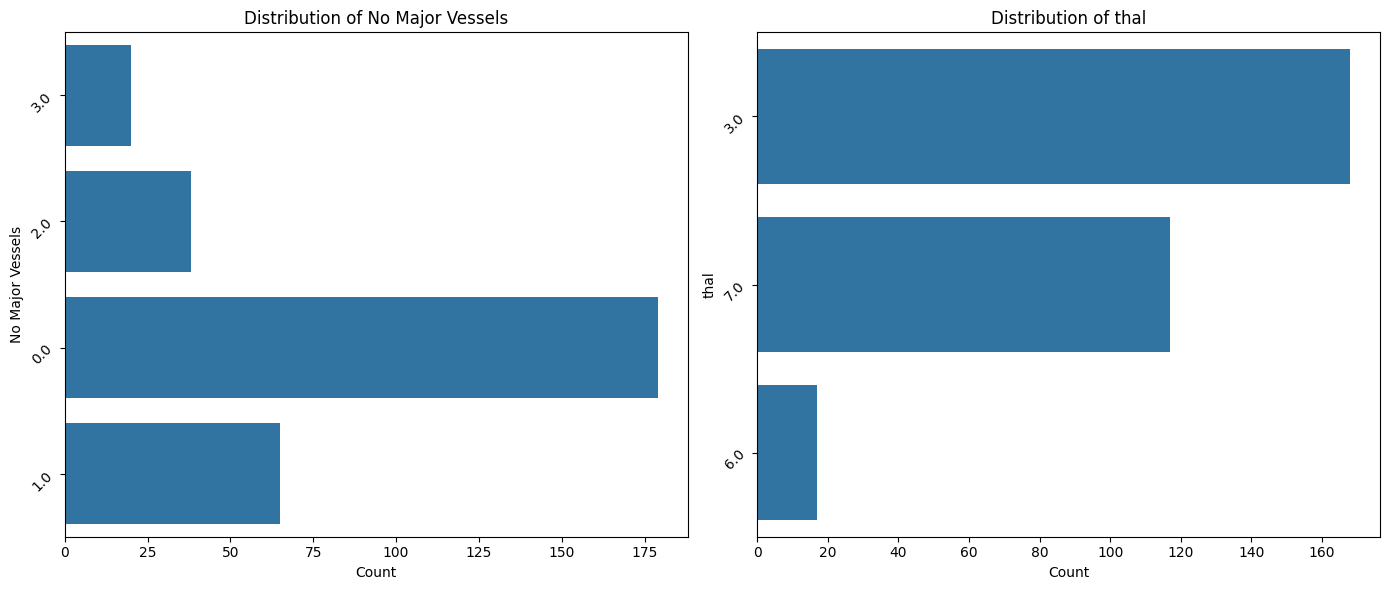

In [119]:
#Visualizations for Categorical Heart Disease Factors
categorical_cols = clean_heart_df.select_dtypes(include=['object']).columns
num_categorical_cols = len(categorical_cols)

fig, axes = plt.subplots(nrows=(num_categorical_cols + 1) // 2, ncols=2, figsize=(14, num_categorical_cols * 3))
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    sns.countplot(y=col, data=clean_heart_df, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel(col)
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()

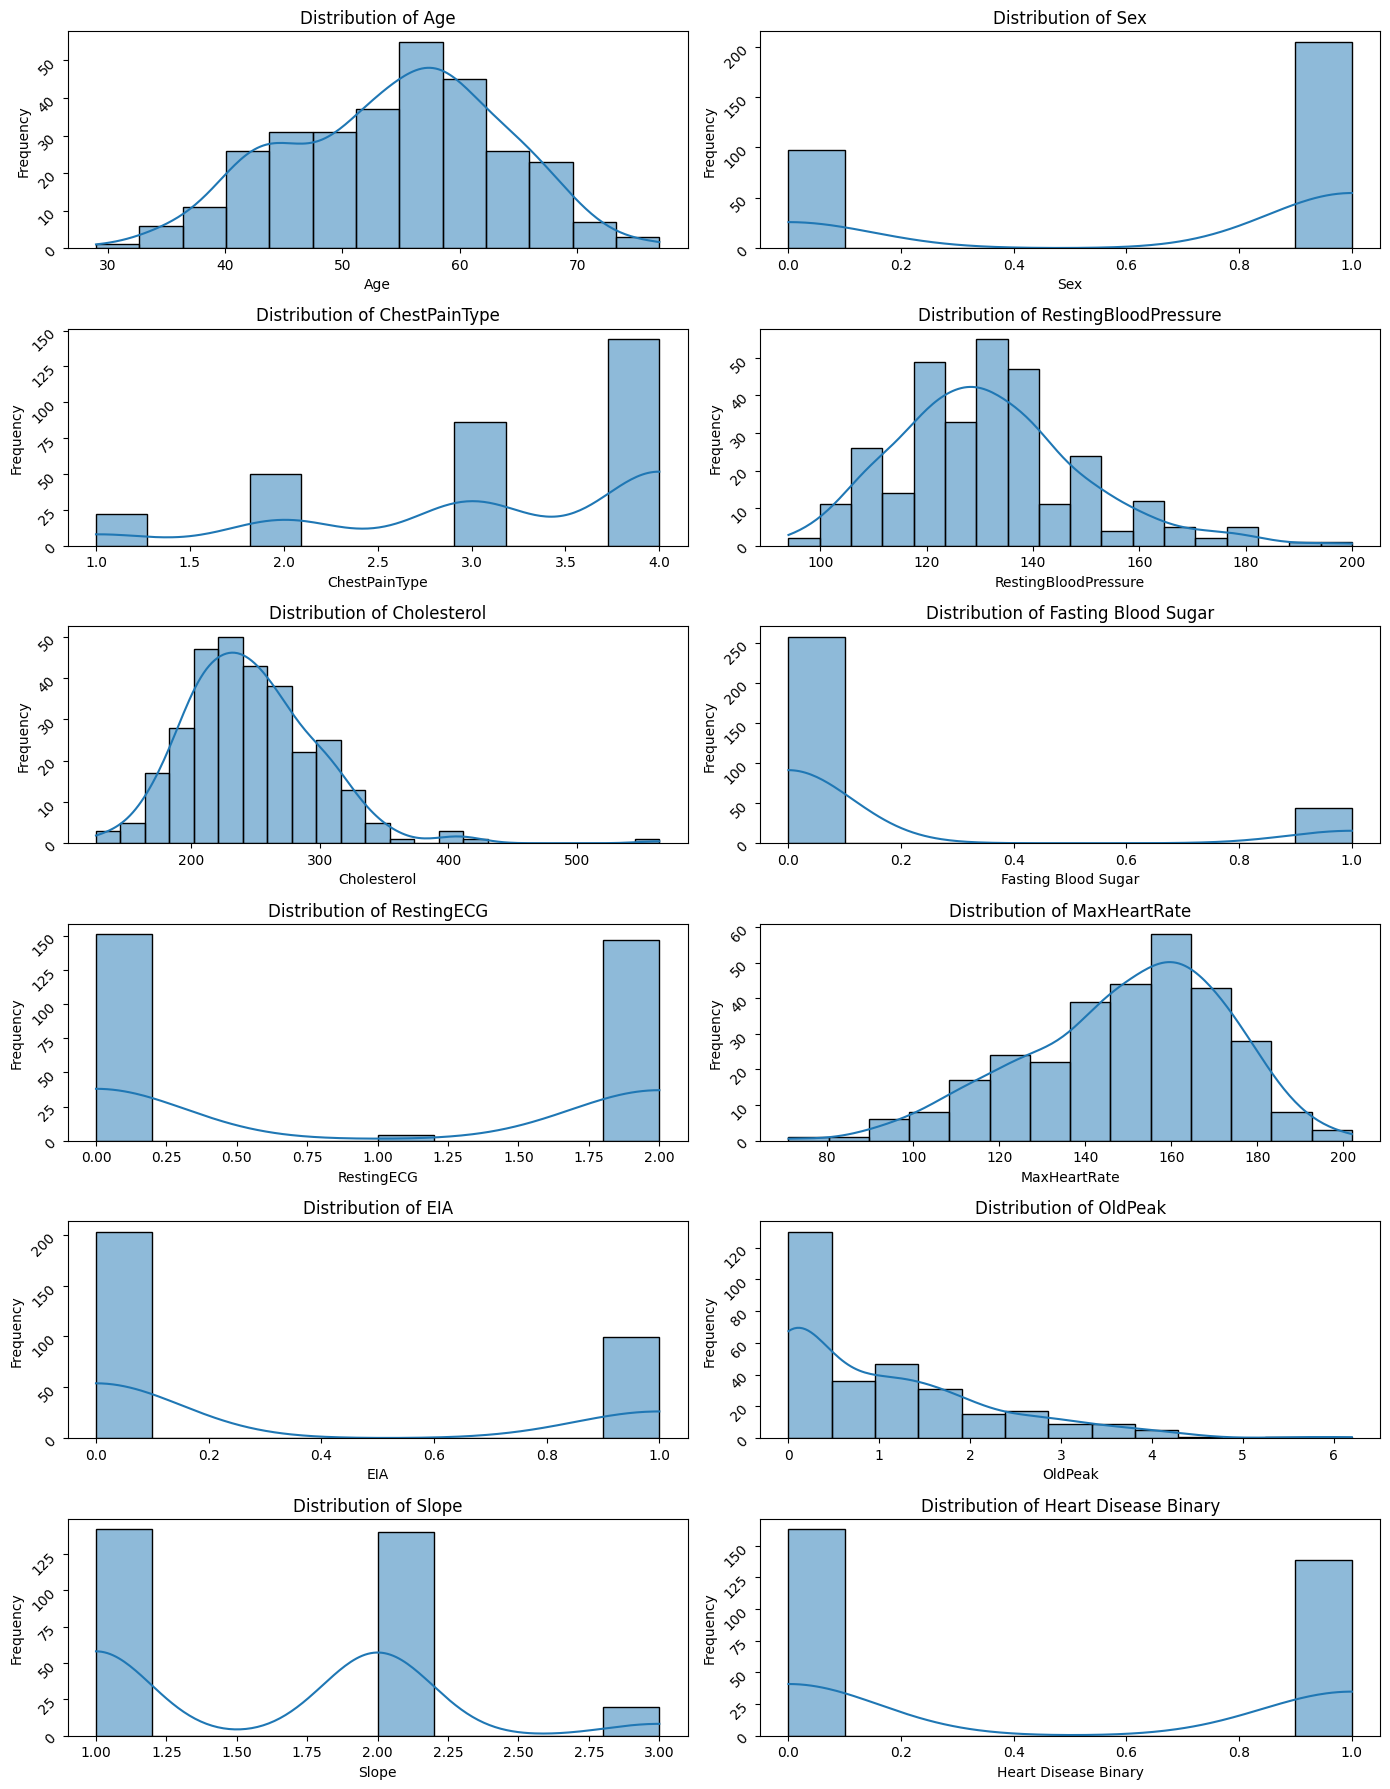

In [120]:
# Visualizations for Numerical Heart Disease Features
numerical_cols = clean_heart_df.select_dtypes(include=['float64', 'int64'])
num_numerical_cols = len(numerical_cols.columns) # Get the number of columns instead of rows

# Adjust figure size and increase the number of rows
fig, axes = plt.subplots(nrows=(num_numerical_cols + 1) // 2, ncols=2, figsize=(14, num_numerical_cols * 1.5))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(clean_heart_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].tick_params(axis='y', rotation=45)

plt.tight_layout()
plt.show()


In [121]:
#Convert Columns With Dtype Object So That Data Can Be Used For Modeling:
for col in categorical_cols:
    try:
        clean_heart_df[col] = pd.to_numeric(clean_heart_df[col], errors='coerce').astype('float64')
    except ValueError:
        print(f"Warning: Column '{col}' could not be converted to 'float64'. Check for non-numeric values.")


In [122]:
clean_heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      302 non-null    float64
 12  thal                  302 non-null    float64
 13  Heart Disease Binary  302 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 33.2 KB


# **Modeling**

In [123]:
# Define features (X) and target variable (y)
X = clean_heart_df.drop(columns=['Heart Disease Binary'])
y = clean_heart_df['Heart Disease Binary']

In [124]:
#Verify Variables
X.info()
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   302 non-null    float64
 1   Sex                   302 non-null    float64
 2   ChestPainType         302 non-null    float64
 3   RestingBloodPressure  302 non-null    float64
 4   Cholesterol           302 non-null    float64
 5   Fasting Blood Sugar   302 non-null    float64
 6   RestingECG            302 non-null    float64
 7   MaxHeartRate          302 non-null    float64
 8   EIA                   302 non-null    float64
 9   OldPeak               302 non-null    float64
 10  Slope                 302 non-null    float64
 11  No Major Vessels      302 non-null    float64
 12  thal                  302 non-null    float64
dtypes: float64(13)
memory usage: 30.8 KB
<class 'pandas.core.series.Series'>
RangeIndex: 302 entries, 0 to 301
Series name: Heart

In [125]:
#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [126]:
#Logistic Regression

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time
start_time = time.time()

#Create and train the Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)  # Increased max_iter for convergence
lr_model.fit(X_train, y_train)

#Make predictions on the test set
lr_y_pred = lr_model.predict(X_test)

# Record end time
end_time = time.time()

# Calculate training time
lr_training_time = end_time - start_time

# Print training time
print(f"Training time: {lr_training_time} seconds")

# Evaluate the model
lr_accuracy = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy: {lr_accuracy}")
print(classification_report(y_test, lr_y_pred))

Training time: 0.22542214393615723 seconds
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.90      0.84      0.87        32
           1       0.84      0.90      0.87        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



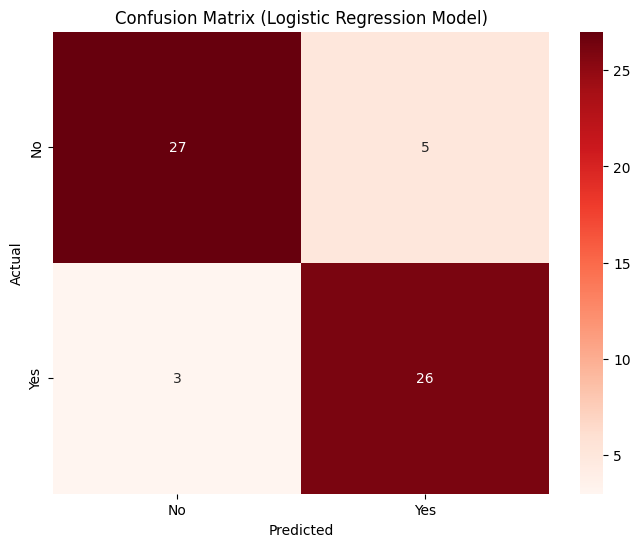

In [127]:
#Confusion matrix for Logistic Regression
cm = confusion_matrix(y_test, lr_y_pred)

# Create Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Logistic Regression Model)")
plt.show()


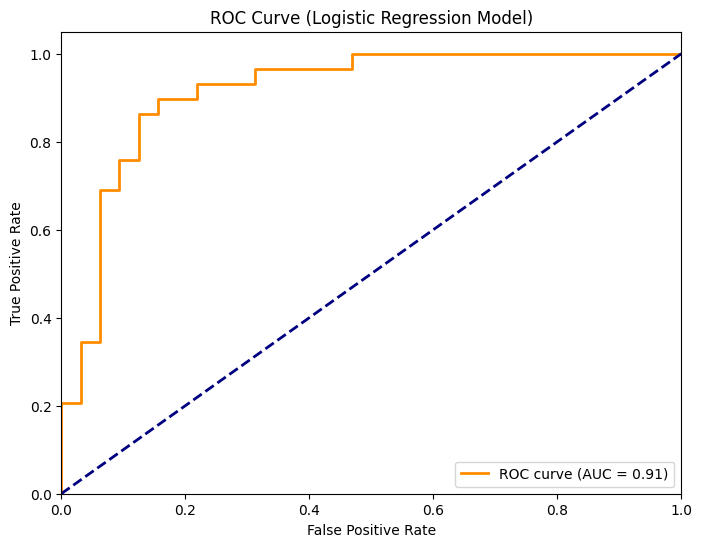

AUC: 0.91


In [128]:
lr_y_pred_proba = lr_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, lr_y_pred_proba)
lr_roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {lr_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Logistic Regression Model)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {lr_roc_auc:.2f}")

In [129]:
#Decision Tree Classifier

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time
start_time = time.time()

#Create and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate and Print training time
dt_training_time = end_time - start_time
print(f"Training time: {dt_training_time} seconds")

#Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

#Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print(f"Accuracy: {dt_accuracy}")
print(classification_report(y_test, dt_y_pred))

Training time: 0.006891012191772461 seconds
Accuracy: 0.7704918032786885
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.83      0.66      0.73        29

    accuracy                           0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61



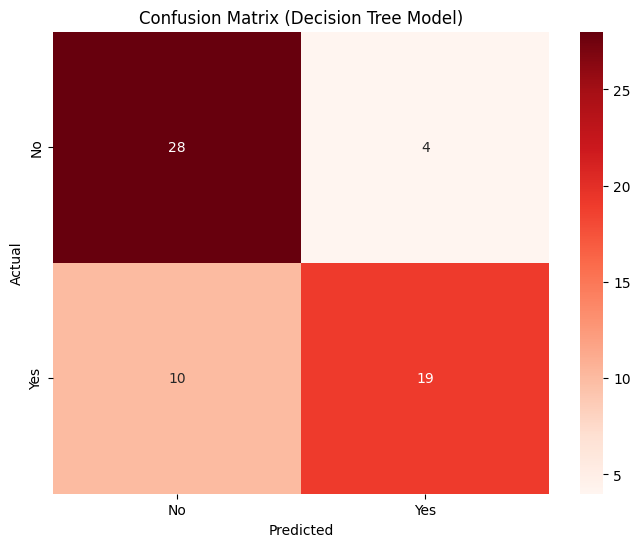

In [130]:
#Confusion matrix for Decision Tree Model
cm = confusion_matrix(y_test, dt_y_pred)

# Create Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Decision Tree Model)")
plt.show()

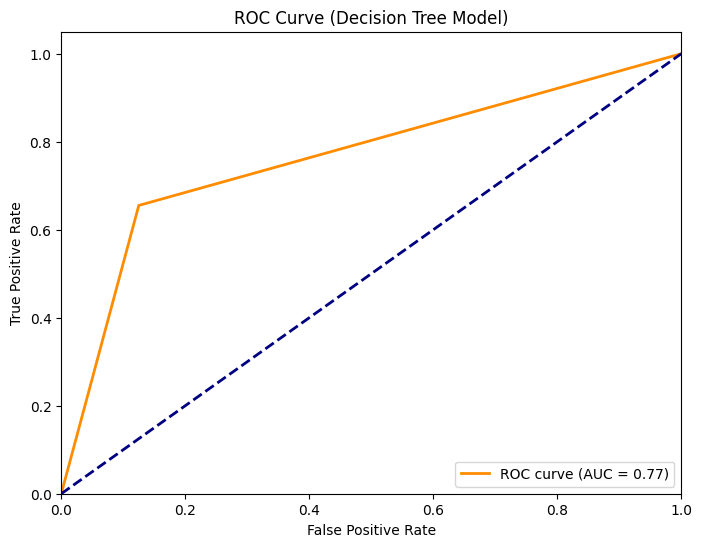

AUC: 0.77


In [131]:
dt_y_pred_proba = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, dt_y_pred_proba)
dt_roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {dt_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Decision Tree Model)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {dt_roc_auc:.2f}")

In [132]:
#K-NearestNeighbors

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Record start time
start_time = time.time()

# Feature scaling (important for KNN)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Record end time
end_time = time.time()

# Calculate and Print training time
knn_training_time = end_time - start_time
print(f"Training time: {knn_training_time} seconds")

# Make predictions on the test set
knn_y_pred = knn_model.predict(X_test)

#  Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print(f"Accuracy: {knn_accuracy}")
print(classification_report(y_test, knn_y_pred))

Training time: 0.012990236282348633 seconds
Accuracy: 0.8688524590163934
              precision    recall  f1-score   support

           0       0.85      0.91      0.88        32
           1       0.89      0.83      0.86        29

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



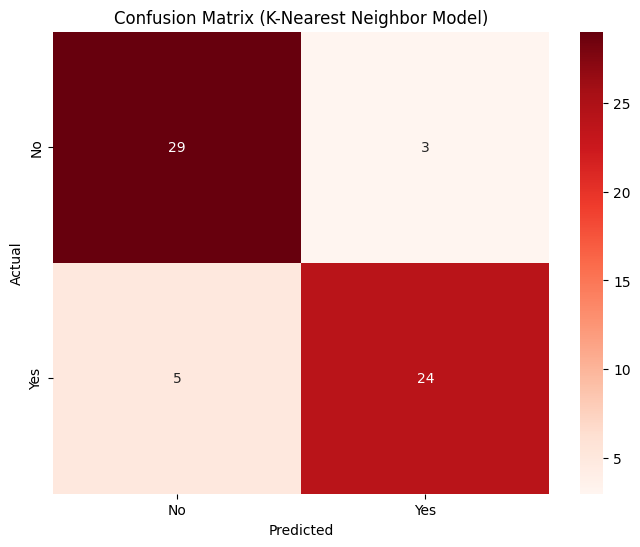

In [133]:
#Confusion matrix for K-Nearest Neighbors Model
cm = confusion_matrix(y_test, knn_y_pred)

# Create Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (K-Nearest Neighbor Model)")
plt.show()

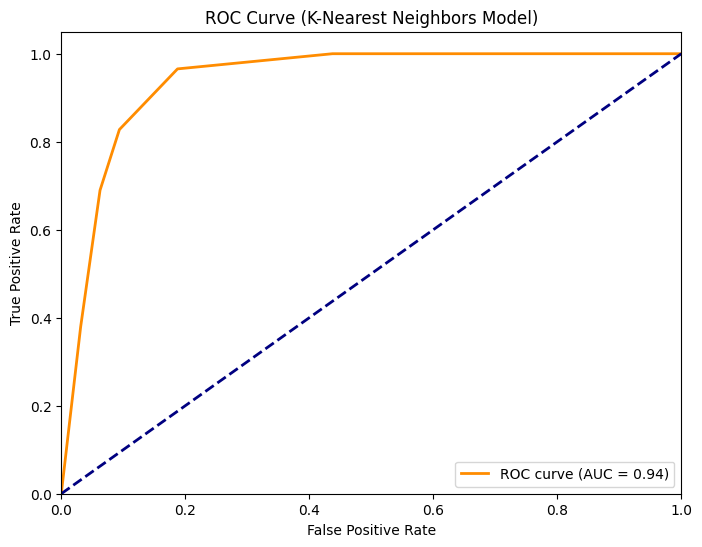

AUC: 0.94


In [134]:
knn_y_pred_proba = knn_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, knn_y_pred_proba)
knn_roc_auc = auc(fpr, tpr)


# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {knn_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (K-Nearest Neighbors Model)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {knn_roc_auc:.2f}")

In [135]:
#SVM

#Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Record start time
start_time = time.time()

#Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#Create and train the SVM model
svm_model = SVC(kernel='sigmoid', random_state=42, probability=True)  # You can try different kernels
svm_model.fit(X_train, y_train)

#Record end time
end_time = time.time()

#Calculate and Print training time
svm_training_time = end_time - start_time
print(f"Training time: {svm_training_time} seconds")

#Make predictions on the test set
svm_y_pred = svm_model.predict(X_test)

# 6. Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print(f"Accuracy: {svm_accuracy}")
print(classification_report(y_test, svm_y_pred))

Training time: 0.051752328872680664 seconds
Accuracy: 0.8852459016393442
              precision    recall  f1-score   support

           0       0.90      0.88      0.89        32
           1       0.87      0.90      0.88        29

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



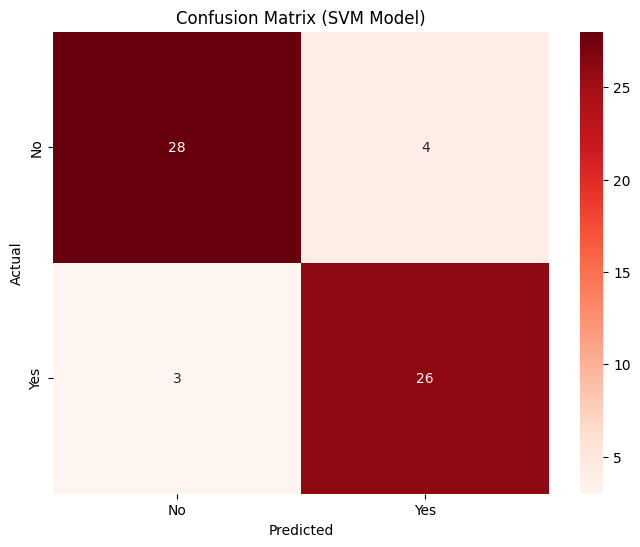

In [136]:
#Confusion matrix for SVM model:
cm = confusion_matrix(y_test, svm_y_pred)

# Create Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Reds",
            xticklabels=["No", "Yes"],
            yticklabels=["No", "Yes"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (SVM Model)")
plt.show()

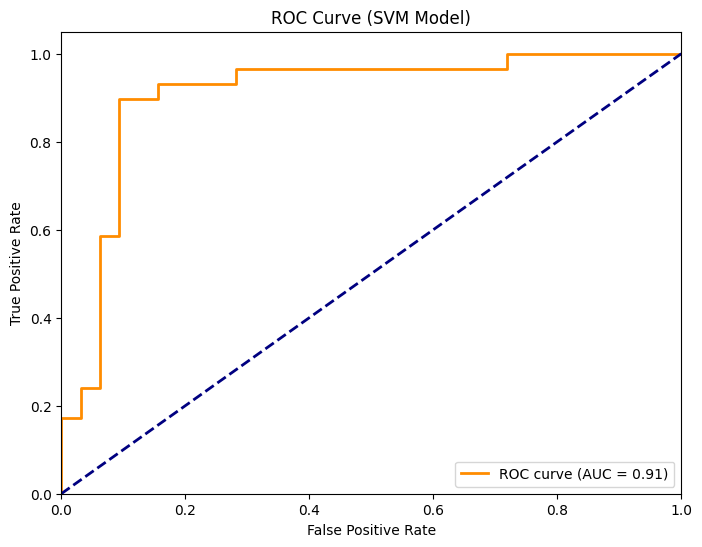

AUC: 0.91


In [137]:
svm_y_pred_proba = svm_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, svm_y_pred_proba)
svm_roc_auc = auc(fpr, tpr)



# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {svm_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (SVM Model)')
plt.legend(loc="lower right")
plt.show()

print(f"AUC: {svm_roc_auc:.2f}")

# **Model Evaluation**

## **Determining Best Model For Predicting Heart Disease and Best Model Overall**

In [145]:
# Create a dictionary to store the classification reports
reports = {
    "Logistic Regression": classification_report(y_test, lr_y_pred, output_dict=True),
    "Decision Tree": classification_report(y_test, dt_y_pred, output_dict=True),
    "SVM": classification_report(y_test, svm_y_pred, output_dict=True),
    "K-Nearest Neighbors": classification_report(y_test, knn_y_pred, output_dict=True)
}

# Create a list to store the data for the DataFrame
data = []
for model, report in reports.items():
    model_added = False
    for label, metrics in report.items():
        if label in ['0', '1', 'macro avg', 'weighted avg']:
            row = {
                'Model': model if not model_added else '',
                'Label': label,
                'Precision': metrics.get('precision', ''),
                'Recall': metrics.get('recall', ''),
                'F1-score': metrics.get('f1-score', ''),
                'Support': metrics.get('support', '')
            }
            data.append(row)
            model_added = True
        elif label == 'accuracy':
            row = {
                'Model': '',
                'Label': label,
                'Precision': '',
                'Recall': '',
                'F1-score': '',
                'Support': report.get(label) if isinstance(report.get(label), dict) and 'support' in report.get(label) else report.get(label, '')
            }
            data.append(row)

# Create a comprehensive classification report and make it a dataframe
classification_reports = pd.DataFrame(data)


# Replace '0' and '1' with no and yes to make it easier to interpret:
classification_reports['Label'] = classification_reports['Label'].replace({'0': 'No', '1': 'Yes'})

# Format to display with two decimal places
numerical_cols = ['Precision', 'Recall', 'F1-score']
classification_reports[numerical_cols] = classification_reports[numerical_cols].applymap(lambda x: f'{x:.4f}' if isinstance(x, float) else x)

# Reorder columns
classification_reports = classification_reports[['Model', 'Label', 'Precision', 'Recall', 'F1-score', 'Support']]

# Add grid lines
classification_reports_styled = classification_reports.style.set_table_styles(
    [{'selector': 'th', 'props': [('border', '1px solid black')]},
     {'selector': 'td', 'props': [('border', '1px solid black')]}]
)

# Show dataframe
display(classification_reports_styled)



,Model,Label,Precision,Recall,F1-score,Support
0,Logistic Regression,No,0.9000,0.8438,0.8710,32.000000
1,,Yes,0.8387,0.8966,0.8667,29.000000
2,,accuracy,,,,0.868852
3,,macro avg,0.8694,0.8702,0.8688,61.000000
4,,weighted avg,0.8709,0.8689,0.8689,61.000000
5,Decision Tree,No,0.7368,0.8750,0.8000,32.000000
6,,Yes,0.8261,0.6552,0.7308,29.000000
7,,accuracy,,,,0.770492
8,,macro avg,0.7815,0.7651,0.7654,61.000000
9,,weighted avg,0.7793,0.7705,0.7671,61.000000


## **Determine Which Model Predicts Heart Disease Best**

To determine which of the four models are best at predicting if a patient has heart disease to diagnose them faster it is important to specifically focus on the recall, F1 Score and precision.  Should focus on recall because it measures how many actual positive cases the model was ablt to identify correctly. A high recall value indicates that the model minimizes the chance of incorrecly diagnosing someone as healthy when they actually might have heart disease. This is important because the use case is medical diagnosis and in this scenario false negatives would be missed case of heart disease which would be representative of a patient that has the possibility of going untreated which can lead to severe health consequences. Additionally, should also look at precision because it provides context as to how many of the predicted positive cases are in fact positive (Minimize false positives.). Minimizing false positives is not as important as minimizing false negatives in this use case because they can still cause emotional and financial stress to the patient being misdiagnosed.  Finally, it is important to analyze the F1 score because it provides information on how effectively the model identifies true cases (recall) while avoiding false positives (precision).

**SVM**



*   Weighted Average Precision: 0.8858(1st)
*   Weighted Average Recall: 0.8852 (1st)
*   Weighted F1 Score: 0.8853 (1st)
 *   Since the SVM model has a high recall it can be deduced that this model catches the majority of actual cases of heart disease while minimizing false negatives which is extremely important for this use case.



**Logistic Regression**



*   Weighted Average Precision: 0.8709 (2nd)
*   Weighted Average Recall: 0.8689 (Tied for 2nd)
*   Weighted Average F1 Score: 0.8689 (2nd)
 *   The recall is similar to that of the SVM model; However, the F1 score is lower as a result of the lower weighted average precision.



**K-Nearest Neighbors**


*   Weighted Average Precision: 0.8700 (3rd)
*   Weighted Average Recall: 0.8689 (Tied for 2nd)
*   Weighted Average F1 Score: 0.8685 (3rd)
 *  When evaluating the performance of this model it is apparent that this model has stronger precision than the SVM and Logistic Regression models; However the recall is lower indicating that this model will look over/misdiagnose more cases of heart diseases. (More False Negative)



**Decision Tree**



*   Weighted Average Precision: 0.7793 (4th)
*   Weighted Average Recall: 0.7705 (4th)
*   Weighted Average F1 Score: 0.7671 (4th)
 *   Worst F1 and Recall due to how poorly this model performed when predicting if heart disease will be present in a patient.  




**Best Weighted Average Precision:** SVM

**Best Weighted Average Recall:** SVM

**Best Weighted Average F1 Score:** SVM

**Best Model For Predicting Heart Disease:** SVM Model is the best model for specifically predicting heart disease because it has the best weighted average recall and weighted average precision which is furter examplified by the fact that SVM has the best weighted average F1 score.



## **Determining The Best Overall Performing Model**



**SVM**



*   Accuracy: 0.8852(1st)
*   Macro Average F1 Score: 0.8851 (1st)
*   Weighted Average F1 Score: 0.8853 (1st)
 *   When looking at these evaluation metrics it is evident that the SVM model consistently performs well across all metrics and both classes.



**Logistic Regression**



*   Accuracy: 0.8689(Tied 2nd)
*   Macro Average F1 Score: 0.8688 (2nd)
*   Weighted Average F1 Score: 0.8689 (2nd)
 *   Upon further analysis can see that this model also has strong performance but slightly weaker than SVM.



**K-Nearest Neighbors**


*   Accuracy: 0.8689(Tied 2nd)
*   Macro Average F1 Score: 0.8680 (3rd)
*   Weighted Average F1 Score: 0.8685 (3rd)
 *   Upon further analysis evident that this model is similar to the logistic regression model but it has weaker F1 scores.



**Decision Tree**


*   Accuracy: 0.7705(4th)
*   Macro Average F1 Score: 0.7654 (4th)
*   Weighted Average F1 Score: 0.7671 (4th)
 *   When looking at the evaluation metrics for this model it is apparent that this model performs this weakest overall.




**Best Accuracy:** SVM

**Best Macro Average F1 Score:** SVM

**Best Weighted Average F1 Score:** SVM

**Best Overall Model For Predicting Heart Disease:** SVM Model is the best overall model because when analyzing its performance it is evident that the SVM model had the highest accuracy and the best balanced performance across all metrics and classes.



##  **Confirming Best Model**

In [146]:
# Data Table containing Accuracy, AUC, and Training Time (seconds) for each model:

models = ["Logistic Regression", "Decision Tree", "SVM", "K-Nearest Neighbors"]
accuracies = [lr_accuracy, dt_accuracy, svm_accuracy, knn_accuracy]
training_times = [lr_training_time, dt_training_time, svm_training_time, knn_training_time]
auc_values = [lr_roc_auc, dt_roc_auc, svm_roc_auc, knn_roc_auc]

model_table = pd.DataFrame({
       "Model": models,
       "Accuracy": accuracies,
       "AUC Values": auc_values,
       "Training Time (seconds)": training_times
   })

print(model_table)

                 Model  Accuracy  AUC Values  Training Time (seconds)
0  Logistic Regression  0.868852    0.914871                 0.225422
1        Decision Tree  0.770492    0.765086                 0.006891
2                  SVM  0.885246    0.907328                 0.051752
3  K-Nearest Neighbors  0.868852    0.938578                 0.012990




By looking at the AUC values and training time can confirm how well a model is able distinguish between classes and also see how long it takes to train. By combining this information with the information above can safely determine which model performs best when it comes to this use case.

 **SVM**



*  Accuracy: 0.0.8852 (1st)
*  AUC: 0.9073 (3rd)
*  Training Time: 0.05175 seconds (3rd)
 *   When analyzing the performance of the SVM model it is apparent that it has the best accuracy but slightly lower AUC than logistic regression and KNN. However, it is important to note that the AUC is still high indicating this model does distinguish between classes well.  It takes the third longest time to train; However, this model performs the best in a majority of metrics so I believe the trade off is worth it.



**Logistic Regression**



*   Accuracy: 0.8689(Tied 2nd)
*   AUC: 0.9149 (2nd)
*   Training Time: 0.2254 seconds (4th)
 *   Upon analysis of the performance of the logistic regression model it is apparent that this model distinguishes between classes well (2nd highest AUC), but is the slowest to train.


**K-Nearest Neighbors**


*   Accuracy: 0.8689(Tied 2nd)
*   AUC: 0.9386 (1st)
*  Training Time: 0.01299 seconds (2nd)
 *   During analysis of the performance of the K-Nearest Neighbors model it is apparent this model has the highest AUC value indicating it is the best at distinguishing between classes and is also efficient due to its relatively short training time.



**Decision Tree**


*   Accuracy: 0.7705(4th)
*   AUC: 0.7651 (4th)
*   Training Time: 0.006891 seconds (1st)
 *   When looking at the evaluation metrics for this model it is apparent that this model performs this weakest overall so it does not matter that it is the model that is most time efficient.


**Best Model:** SVM is the best performing model when it comes to predicting if heart disease is present in a patient or not.

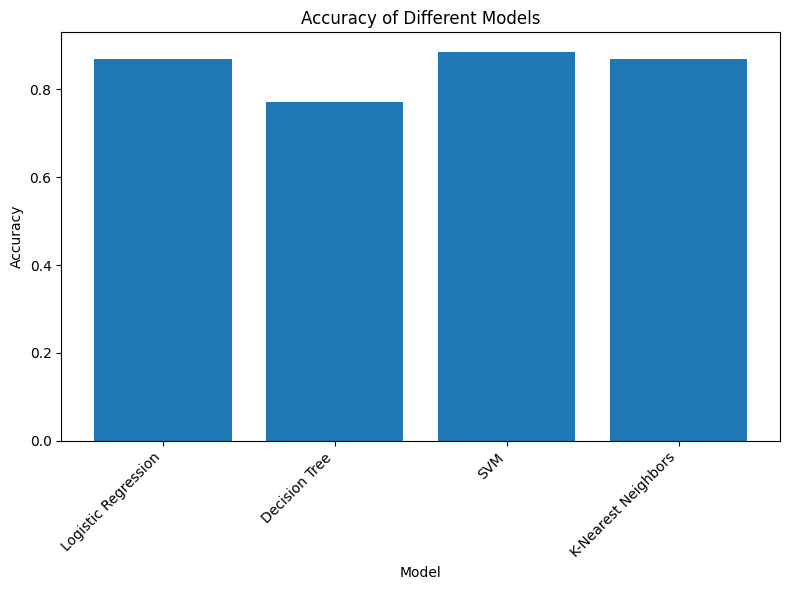

In [147]:
#Graph for Accuracy of Different Models
plt.figure(figsize=(8, 6))
plt.bar(model_table["Model"], model_table["Accuracy"])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Accuracy of Different Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

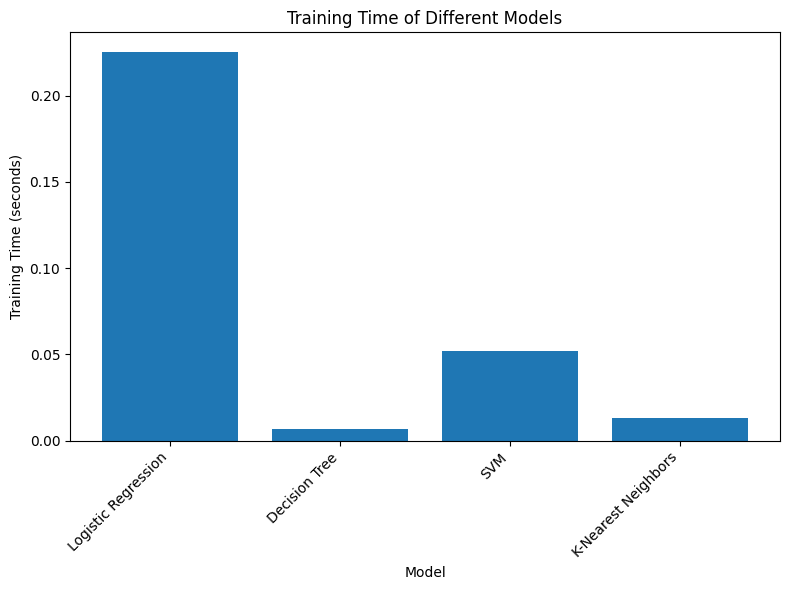

In [148]:
# Graph For Training Time of Different Models
plt.figure(figsize=(8, 6))
plt.bar(model_table["Model"], model_table["Training Time (seconds)"])
plt.xlabel("Model")
plt.ylabel("Training Time (seconds)")
plt.title("Training Time of Different Models")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()

## **What Factors Are Most Important In Predicting if Patients Have Heart Disease?**

                 Feature  Importance
11      No Major Vessels    0.100000
12                  thal    0.072131
2          ChestPainType    0.044262
1                    Sex    0.037705
8                    EIA    0.026230
10                 Slope    0.021311
9                OldPeak    0.011475
0                    Age    0.003279
4            Cholesterol    0.003279
5    Fasting Blood Sugar    0.003279
7           MaxHeartRate    0.001639
3   RestingBloodPressure    0.000000
6             RestingECG    0.000000


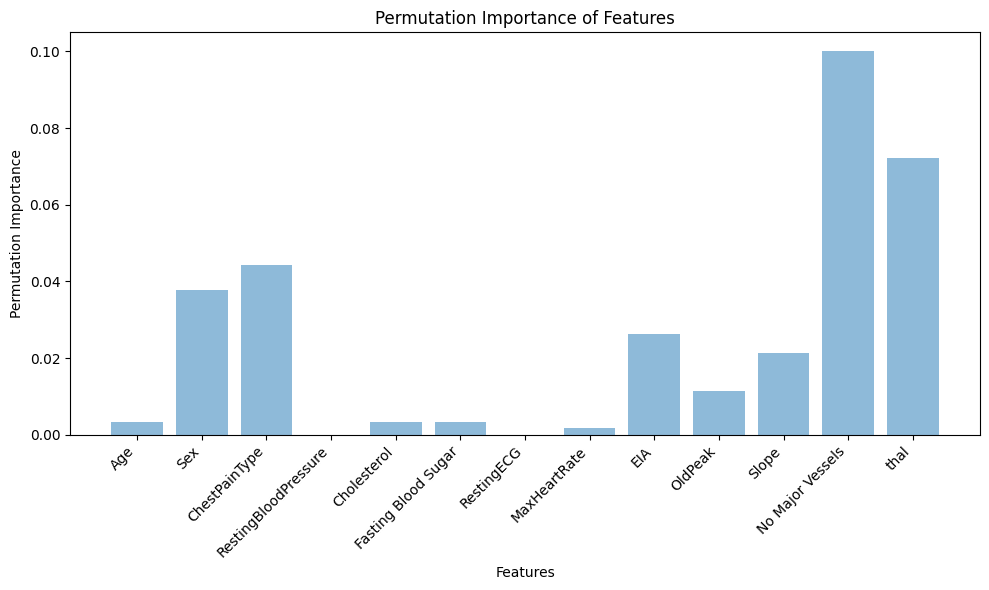

In [149]:
# Calculate permutation importance for SVM (Best Model):
result = permutation_importance(
    svm_model, X_test, y_test, n_repeats=10, random_state=42, scoring='accuracy'
)

# Define importances variable with feature importances:
importances = result.importances_mean

# Get feature names from the original X DataFrame (before scaling)
feature_names = X.columns

# Create DataFrame for visualization:
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances:
print(importance_df)

# Graph of feature importances:
plt.figure(figsize=(10, 6))
plt.bar(X.columns, importances, align="center", alpha=0.5)
plt.xlabel("Features")
plt.ylabel("Permutation Importance")
plt.title("Permutation Importance of Features")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



From the table and graph above it is possible to determine what factors are most important to monitor to predict if a patient will have heart disease. The
4 most important factors from most to least imapctful are number of major vessles colored by flourosopy, thalac (maximum heart rate achieved in bpm), chest pain type, and sex of the patients.

# **Conclusion**

It can be deduced from this notebook that it is possible to predict presence of heart disease by using classification models such as K-Nearest Neighbors, Decision Trees, SVM, and Logistic Regression. Additionally, the best overall performing model and best model  for predicting presence of heart disease was the SVM model.  Finally, the four most important features (in order of most important to least important) in predicting the presence of heart disease are number of major vessles colored by flourosopy, thalac (maximum heart rate achieved in bpm), chest pain type, and sex of the patients.

# **Next Steps**

Since this model would be used in the healthcare industry it is important to make sure that this model complys with industry relevant regulations such as HIPAA and the FDA before deployment. Additionally, it is also important to continuosly improve the model and monitor the metrics to track performance.  Possible to do this by periodically retraining the model or improving the model through use of ensemble methods for classification.  